In [19]:
from collections import Counter
from datasets import load_dataset
from tqdm import tqdm

In [5]:
# data download
dataset = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_review_Clothing_Shoes_and_Jewelry", trust_remote_code=True)
print(dataset["full"][0])

Using the latest cached version of the module from /Users/suhyeon/.cache/huggingface/modules/datasets_modules/datasets/McAuley-Lab--Amazon-Reviews-2023/16b76e0823d73bb8cff1e9c5e3e37dbc46ae3daee380417ae141f5e67d3ea8e8 (last modified on Mon Apr 29 14:04:54 2024) since it couldn't be found locally at McAuley-Lab/Amazon-Reviews-2023, or remotely on the Hugging Face Hub.


Loading dataset shards:   0%|          | 0/20 [00:00<?, ?it/s]

{'rating': 3.0, 'title': 'Arrived Damaged : liquid in hub locker!', 'text': 'Unfortunately Amazon in their wisdom (cough, cough) decided to ship the snowsuit in a vinyl bag with holes in it!  There was no other bag to protect the snowsuit inside vinyl bag with all the holes.  This is what happened:  Arrived in hub locker. It was the very top locker. Opened it & pulled the pkg out getting a very wet & nasty surprise at the same time. My senses were assaulted. Smells like tea tree oil. Feels like conditioner or lotion.  I can’t understand how the delivery person a) didn’t smell that mess when they shoved the pkg in b) didn’t see the mess when they shoved it in - tho if they were short I guess that would explain it bc I’m 5’10” & I didn’t see it until the pkg was in my hands. The locker was up high & dark, but I could smell it the minute I walked into the hub locker room. I happen to be extremely allergic to tea tree oil.  It’s made from mellaleuca trees which grow all over southwest Flor

In [7]:
meta_dataset = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_meta_Clothing_Shoes_and_Jewelry", split="full", trust_remote_code=True)
print(meta_dataset[0])

Loading dataset shards:   0%|          | 0/31 [00:00<?, ?it/s]

{'main_category': 'AMAZON FASHION', 'title': "BALEAF Women's Long Sleeve Zip Beach Coverup UPF 50+ Sun Protection Hooded Cover Up Shirt Dress with Pockets", 'average_rating': 4.2, 'rating_number': 422, 'features': ['90% Polyester, 10% Spandex', 'Zipper closure', 'Machine Wash', 'Long sleeve sun protection coverups--UPF 50+ blocks the sun from burning', 'Zipped v-neckline--fashionable V neck and smooth 1/4 zipper allows to staying place as you like', 'Two drop-in side pockets--hold your phone or keys well，no worries of falling out', 'Hoodie with non-slip drawcord--Enhancing hooded design is convenient to wrap your face and enough space to put your head and hair easily', 'A flattering coverups company you spend all day on the beach，traveling with lovers or busying around house. Recommended For everyday leisure or daily exercise'], 'description': [], 'price': '31.99', 'images': {'hi_res': ['https://m.media-amazon.com/images/I/61KIZjb54AL._AC_UL1500_.jpg', 'https://m.media-amazon.com/image

In [2]:
# check data format
dataset

DatasetDict({
    full: Dataset({
        features: ['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id', 'timestamp', 'helpful_vote', 'verified_purchase'],
        num_rows: 32870495
    })
})

In [3]:
# total review count
len(dataset['full'])

32870495

In [10]:
# review with image
k=0
for i in range(len(dataset['full'])):
    if (dataset['full'][i]['images']):
        k += 1
print(k)

1769572


In [22]:
# 한 리뷰에 이미지 수가 몇개인지 확인
img_cnt = [len(item['images']) for item in dataset['full'] if item['images']]
        

In [25]:
# 이미지 수 리스트인 img_cnt에서 각 값의 빈도수를 세기
distribution = Counter(img_cnt)

# 결과 출력
print(distribution)

Counter({1: 1050830, 2: 398621, 3: 173493, 4: 75249, 5: 32675, 6: 17058, 7: 8401, 8: 5031, 9: 2747, 10: 1894, 11: 1058, 12: 783, 13: 460, 14: 358, 15: 229, 16: 177, 17: 110, 18: 105, 19: 70, 20: 58, 21: 33, 24: 24, 22: 22, 26: 17, 23: 16, 30: 15, 25: 12, 28: 10, 29: 2, 27: 2, 32: 2, 247: 1, 34: 1, 64: 1, 37: 1, 31: 1, 47: 1, 63: 1, 62: 1, 43: 1, 40: 1})


In [6]:
# meta 데이터랑 Merge
# meta 의 'parent_asin'변수 랑 review의 'parent_asin'랑 매치
# meta에 'review' dict 추가, 기존에 있던 리뷰 append

meta_dataset = [{'main_category': 'AMAZON FASHION', 'title': "BALEAF Women's Long Sleeve Zip Beach Coverup UPF 50+ Sun Protection Hooded Cover Up Shirt Dress with Pockets", 'average_rating': 4.2, 
                 'rating_number': 422, 'features': ['90% Polyester, 10% Spandex', 'Zipper closure', 'Machine Wash', 'Long sleeve sun protection coverups--UPF 50+ blocks the sun from burning', 'Zipped v-neckline--fashionable V neck and smooth 1/4 zipper allows to staying place as you like', 'Two drop-in side pockets--hold your phone or keys well，no worries of falling out', 'Hoodie with non-slip drawcord--Enhancing hooded design is convenient to wrap your face and enough space to put your head and hair easily', 'A flattering coverups company you spend all day on the beach，traveling with lovers or busying around house. Recommended For everyday leisure or daily exercise'], 
                 'description': [], 'price': 31.99, 
                 'images': [{'thumb': 'https://m.media-amazon.com/images/I/31zPYU+UkVL._AC_SR38,50_.jpg', 'large': 'https://m.media-amazon.com/images/I/31zPYU+UkVL._AC_.jpg', 'variant': 'MAIN', 'hi_res': 'https://m.media-amazon.com/images/I/61KIZjb54AL._AC_UL1500_.jpg'}, 
                            {'thumb': 'https://m.media-amazon.com/images/I/31LYNX5KQ6L._AC_SR38,50_.jpg', 'large': 'https://m.media-amazon.com/images/I/31LYNX5KQ6L._AC_.jpg', 'variant': 'PT01', 'hi_res': 'https://m.media-amazon.com/images/I/61OkTrsW88L._AC_UL1500_.jpg'}, 
                            {'thumb': 'https://m.media-amazon.com/images/I/51dD8Ga+wQL._AC_SR38,50_.jpg', 'large': 'https://m.media-amazon.com/images/I/51dD8Ga+wQL._AC_.jpg', 'variant': 'PT02', 'hi_res': 'https://m.media-amazon.com/images/I/811lbVuVIAL._AC_UL1500_.jpg'}, 
                            {'thumb': 'https://m.media-amazon.com/images/I/41kM3Cn3ERL._AC_SR38,50_.jpg', 'large': 'https://m.media-amazon.com/images/I/41kM3Cn3ERL._AC_.jpg', 'variant': 'PT03', 'hi_res': 'https://m.media-amazon.com/images/I/71wa-UQGlYL._AC_UL1500_.jpg'}, 
                            {'thumb': 'https://m.media-amazon.com/images/I/41ZzITDO+OL._AC_SR38,50_.jpg', 'large': 'https://m.media-amazon.com/images/I/41ZzITDO+OL._AC_.jpg', 'variant': 'PT04', 'hi_res': 'https://m.media-amazon.com/images/I/61tspZIpHqL._AC_UL1500_.jpg'}, 
                            {'thumb': 'https://m.media-amazon.com/images/I/51jTzfIP3dL._AC_SR38,50_.jpg', 'large': 'https://m.media-amazon.com/images/I/51jTzfIP3dL._AC_.jpg', 'variant': 'PT05', 'hi_res': 'https://m.media-amazon.com/images/I/71oVECB3VYL._AC_UL1500_.jpg'}], 
                 'videos': [{'title': "Women's UPF 50+ Front Zip Beach Coverups with Pockets", 'url': 'https://www.amazon.com/vdp/0041f3df9f604577bd982078c9f3fec2?ref=dp_vse_rvc_0', 'user_id': ''}, 
                            {'title': " Women's Swim Cover Up Dress", 'url': 'https://www.amazon.com/vdp/0222bb314b16471a8b43f19080358fdc?ref=dp_vse_rvc_1', 'user_id': ''}], 
                 'store': 'BALEAF', 'categories': ['Clothing, Shoes & Jewelry', 'Women', 'Clothing', 'Swimsuits & Cover Ups', 'Cover-Ups'], 
                 'details': {'Department': 'womens', 'Date First Available': 'April 3, 2022'}, 
                 'parent_asin': 'B09X1MRDN6', 'bought_together': None}
                
                ,{'main_category': 'AMAZON FASHION', 'title': 'Merrell Work Moab 2 Vent Waterproof SR Boulder', 'average_rating': 2.7, 
                  'rating_number': 4, 'features': ['Rubber sole'], 
                  'description': [], 'price': None, 
                  'images': [{'thumb': 'https://m.media-amazon.com/images/I/41TeICZuYgL._AC_US40_.jpg', 'large': 'https://m.media-amazon.com/images/I/41TeICZuYgL._AC_.jpg', 'variant': 'MAIN', 'hi_res': 'https://m.media-amazon.com/images/I/81oltcdwYSL._AC_UL1500_.jpg'}], 
                  'videos': [], 'store': 'Merrell', 'categories': ['Clothing, Shoes & Jewelry', 'Women', 'Shoes', 'Outdoor', 'Hiking & Trekking', 'Hiking Shoes'], 
                  'details': {'Package Dimensions': '14.02 x 9.29 x 4.8 inches; 1 Pounds', 'Item model number': '00-3C4Q7W8I-AX', 'Department': 'womens', 'Date First Available': 'November 2, 2017'}, 
                  'parent_asin': 'B073C4Q7W8', 'bought_together': None}
]

dataset['full'] = [{'rating': 3.0, 'title': 'Arrived Damaged : liquid in hub locker!', 
                    'text': 'Unfortunately Amazon in their wisdom (cough, cough) decided to ship the snowsuit in a vinyl bag with holes in it!  There was no other bag to protect the snowsuit inside vinyl bag with all the holes.  This is what happened:  Arrived in hub locker. It was the very top locker. Opened it & pulled the pkg out getting a very wet & nasty surprise at the same time. My senses were assaulted. Smells like tea tree oil. Feels like conditioner or lotion.  I can’t understand how the delivery person a) didn’t smell that mess when they shoved the pkg in b) didn’t see the mess when they shoved it in - tho if they were short I guess that would explain it bc I’m 5’10” & I didn’t see it until the pkg was in my hands. The locker was up high & dark, but I could smell it the minute I walked into the hub locker room. I happen to be extremely allergic to tea tree oil.  It’s made from mellaleuca trees which grow all over southwest Florida where I was raised.  Tho native to Australia they were used to help drain the swamps of Florida generations ago bc they soak up so much water.  It has a very distinct smell & unfortunately is frequently used as a “carrier oil” for other oils & body lotions,  shampoos, conditioners, etc., so I have to be hyper-vigilant to avoid exposure.  Instead- Last night I got to suck down Benadryl & pray my throat didn’t close while keeping my epi-pens handy.  The liquid went through the holes & onto the snowsuit as you can clearly see in the pictures.  So I guess the suit is waterproof.  Looks true to size.  Elastic appears stretchy.  I’m super annoyed that this arrived in this condition & could have easily been avoided by amazon properly wrapping it to avoid the elements whatever they may be.', 
                    'images': [{'attachment_type': 'IMAGE', 'large_image_url': 'https://m.media-amazon.com/images/I/710WrjJi+hL._SL1600_.jpg', 'medium_image_url': 'https://m.media-amazon.com/images/I/710WrjJi+hL._SL800_.jpg', 'small_image_url': 'https://m.media-amazon.com/images/I/710WrjJi+hL._SL256_.jpg'}, {'attachment_type': 'IMAGE', 'large_image_url': 'https://m.media-amazon.com/images/I/712+yNg8COL._SL1600_.jpg', 'medium_image_url': 'https://m.media-amazon.com/images/I/712+yNg8COL._SL800_.jpg', 'small_image_url': 'https://m.media-amazon.com/images/I/712+yNg8COL._SL256_.jpg'}, {'attachment_type': 'IMAGE', 'large_image_url': 'https://m.media-amazon.com/images/I/7132ByALa+L._SL1600_.jpg', 'medium_image_url': 'https://m.media-amazon.com/images/I/7132ByALa+L._SL800_.jpg', 'small_image_url': 'https://m.media-amazon.com/images/I/7132ByALa+L._SL256_.jpg'}, 
                               {'attachment_type': 'IMAGE', 'large_image_url': 'https://m.media-amazon.com/images/I/718OTnxL+CL._SL1600_.jpg', 'medium_image_url': 'https://m.media-amazon.com/images/I/718OTnxL+CL._SL800_.jpg', 'small_image_url': 'https://m.media-amazon.com/images/I/718OTnxL+CL._SL256_.jpg'}, {'attachment_type': 'IMAGE', 'large_image_url': 'https://m.media-amazon.com/images/I/71I6b8DyazL._SL1600_.jpg', 'medium_image_url': 'https://m.media-amazon.com/images/I/71I6b8DyazL._SL800_.jpg', 'small_image_url': 'https://m.media-amazon.com/images/I/71I6b8DyazL._SL256_.jpg'}, {'attachment_type': 'IMAGE', 'large_image_url': 'https://m.media-amazon.com/images/I/71v4KKrIXuL._SL1600_.jpg', 'medium_image_url': 'https://m.media-amazon.com/images/I/71v4KKrIXuL._SL800_.jpg', 'small_image_url': 'https://m.media-amazon.com/images/I/71v4KKrIXuL._SL256_.jpg'}], 
                    'asin': 'B096S6LZV4', 'parent_asin': 'B073C4Q7W8', 'user_id': 'AFKZENTNBQ7A7V7UXW5JJI6UGRYQ', 'timestamp': 1677938767351, 'helpful_vote': 0, 'verified_purchase': True}, 
                   
                   {'rating': 2.0, 'title': 'test2', 
                    'text': 'Unfortunately Amazon in their wisdom (cough, cough) decided to ship the snowsuit in a vinyl bag with holes in it!  There was no other bag to protect the snowsuit inside vinyl bag with all the holes.  This is what happened:  Arrived in hub locker. It was the very top locker. Opened it & pulled the pkg out getting a very wet & nasty surprise at the same time. My senses were assaulted. Smells like tea tree oil. Feels like conditioner or lotion.  I can’t understand how the delivery person a) didn’t smell that mess when they shoved the pkg in b) didn’t see the mess when they shoved it in - tho if they were short I guess that would explain it bc I’m 5’10” & I didn’t see it until the pkg was in my hands. The locker was up high & dark, but I could smell it the minute I walked into the hub locker room. I happen to be extremely allergic to tea tree oil.  It’s made from mellaleuca trees which grow all over southwest Florida where I was raised.  Tho native to Australia they were used to help drain the swamps of Florida generations ago bc they soak up so much water.  It has a very distinct smell & unfortunately is frequently used as a “carrier oil” for other oils & body lotions,  shampoos, conditioners, etc., so I have to be hyper-vigilant to avoid exposure.  Instead- Last night I got to suck down Benadryl & pray my throat didn’t close while keeping my epi-pens handy.  The liquid went through the holes & onto the snowsuit as you can clearly see in the pictures.  So I guess the suit is waterproof.  Looks true to size.  Elastic appears stretchy.  I’m super annoyed that this arrived in this condition & could have easily been avoided by amazon properly wrapping it to avoid the elements whatever they may be.', 
                    'images': [{'attachment_type': 'IMAGE', 'large_image_url': 'https://m.media-amazon.com/images/I/710WrjJi+hL._SL1600_.jpg', 'medium_image_url': 'https://m.media-amazon.com/images/I/710WrjJi+hL._SL800_.jpg', 'small_image_url': 'https://m.media-amazon.com/images/I/710WrjJi+hL._SL256_.jpg'}, 
                               {'attachment_type': 'IMAGE', 'large_image_url': 'https://m.media-amazon.com/images/I/712+yNg8COL._SL1600_.jpg', 'medium_image_url': 'https://m.media-amazon.com/images/I/712+yNg8COL._SL800_.jpg', 'small_image_url': 'https://m.media-amazon.com/images/I/712+yNg8COL._SL256_.jpg'}, 
                               {'attachment_type': 'IMAGE', 'large_image_url': 'https://m.media-amazon.com/images/I/7132ByALa+L._SL1600_.jpg', 'medium_image_url': 'https://m.media-amazon.com/images/I/7132ByALa+L._SL800_.jpg', 'small_image_url': 'https://m.media-amazon.com/images/I/7132ByALa+L._SL256_.jpg'}, 
                               {'attachment_type': 'IMAGE', 'large_image_url': 'https://m.media-amazon.com/images/I/718OTnxL+CL._SL1600_.jpg', 'medium_image_url': 'https://m.media-amazon.com/images/I/718OTnxL+CL._SL800_.jpg', 'small_image_url': 'https://m.media-amazon.com/images/I/718OTnxL+CL._SL256_.jpg'}, 
                               {'attachment_type': 'IMAGE', 'large_image_url': 'https://m.media-amazon.com/images/I/71I6b8DyazL._SL1600_.jpg', 'medium_image_url': 'https://m.media-amazon.com/images/I/71I6b8DyazL._SL800_.jpg', 'small_image_url': 'https://m.media-amazon.com/images/I/71I6b8DyazL._SL256_.jpg'}, 
                               {'attachment_type': 'IMAGE', 'large_image_url': 'https://m.media-amazon.com/images/I/71v4KKrIXuL._SL1600_.jpg', 'medium_image_url': 'https://m.media-amazon.com/images/I/71v4KKrIXuL._SL800_.jpg', 'small_image_url': 'https://m.media-amazon.com/images/I/71v4KKrIXuL._SL256_.jpg'}], 
                    'asin': 'B096S6LZV4', 'parent_asin': 'B073C4Q7W8', 'user_id': 'AFKZENTNBQ7A7V7UXW5JJI6UGRYQ', 'timestamp': 1677938767351, 'helpful_vote': 0, 'verified_purchase': True}]

#for i in tqdm(range(len(meta_dataset)), total = len(meta_dataset)):
#    meta_dataset[i]['review'] = []
#    for j in tqdm(range(len(dataset['full'])), total = len(dataset['full'])):
#        if dataset['full'][j]['parent_asin'] == meta_dataset[i]['parent_asin']:
#            meta_dataset[i]['review'].append(dataset['full'][j])
    

In [7]:
# parent_asin을 기준으로 review 데이터를 그룹화하는 딕셔너리 생성
review_dict = {}
for review in tqdm(dataset['full'], desc="Processing dataset"):
    parent_asin = review['parent_asin']
    if parent_asin in review_dict:
        review_dict[parent_asin].append(review)
    else:
        review_dict[parent_asin] = [review]

# meta_dataset을 순회하면서 각 항목에 대한 review 데이터 추가
for item in tqdm(meta_dataset, desc="Processing meta_dataset"):

    parent_asin = item['parent_asin']
    if parent_asin in review_dict:
        item['review'] = review_dict[parent_asin]
    else:
        item['review'] = []


Processing meta_dataset: 100%|██████████| 2/2 [00:00<00:00, 27060.03it/s]


In [16]:
list2 = []
k = 0
for item in review_dict.items():
    list2.append(item)
    k += 1
    
    if k == 30:
        break
    
    

In [18]:
list2

[('B073C4Q7W8',
  [{'rating': 3.0,
    'title': 'Arrived Damaged : liquid in hub locker!',
    'text': 'Unfortunately Amazon in their wisdom (cough, cough) decided to ship the snowsuit in a vinyl bag with holes in it!  There was no other bag to protect the snowsuit inside vinyl bag with all the holes.  This is what happened:  Arrived in hub locker. It was the very top locker. Opened it & pulled the pkg out getting a very wet & nasty surprise at the same time. My senses were assaulted. Smells like tea tree oil. Feels like conditioner or lotion.  I can’t understand how the delivery person a) didn’t smell that mess when they shoved the pkg in b) didn’t see the mess when they shoved it in - tho if they were short I guess that would explain it bc I’m 5’10” & I didn’t see it until the pkg was in my hands. The locker was up high & dark, but I could smell it the minute I walked into the hub locker room. I happen to be extremely allergic to tea tree oil.  It’s made from mellaleuca trees which g

In [14]:
review_dict
import json
file_name = 'hi.json'
with open(file_name, "w") as f:
    json.dump(review_dict, f)

In [23]:
import json

#file_name = "my_data.json"
#
## Write the list to a JSON file
#with open(file_name, "w") as f:
#    json.dump(meta_dataset, f)

In [24]:
file_name = "review.json"
with open(file_name, "r") as f:
    review_dict = json.load(f)

In [25]:
len(review_dict)

4792357

In [52]:
review_dict_test = review_dict[:5]
print(review_dict_test)

TypeError: unhashable type: 'slice'

In [ ]:
file_name = "sample.json"
with open(file_name, "r") as f:
    review_dict_test = json.load(f)

In [56]:
# product에 대한 리뷰 이미지 개수 확인


def count_img(reviews):

    img_user = 0 # 이미지를 올린 유저의 수
    img_cnt = 0 # product 당 리뷰 이미지 수
        
    for review in reviews:
        if review['images']:
            img_user += 1
            img_cnt += len(review['images'])
            
    return img_user, img_cnt
    
review_cnt_dict = {}

for item in review_dict.items():
    
    stop = 0
    
    parent_asin = item[0] # product ID
    img_user, img_cnt = count_img(item[1])
    
    review_cnt_dict[parent_asin] = {'total_review_cnt' : len(item[1]), 
                                          'img_user': img_user,
                                          'img_cnt': img_cnt}
    
    stop += 1
    if stop == 3:
        break
    
    

In [60]:
import json
file_name = 'review_img_cnt.json'
with open(file_name, "w") as f:
    json.dump(review_cnt_dict, f)
    

In [3]:
import json
file_name = "review_img_cnt.json"
with open(file_name, "r") as f:
    review_cnt_dict = json.load(f)

In [4]:
import pandas as pd

df = pd.DataFrame(review_cnt_dict)
df

,B09NSZ5QMF,B08NGL3X17,B07RGM3DYC,B07BWS4CSM,B09GY6SG2C,B07HJ84J9M,B01DDC83C8,B0BNP511CS,B01KY0E8TO,B07V6PKCCG,...,B07BQG1X8H,B07XMBHFXG,B07ZDP76J4,B07TS8ZCTJ,B0B8SR8XJ5,B008KSL1CK,B0B77DSP6Y,B08R3KNXMR,B00AMAFE40,B09JVQT6C3
total_review_cnt,248,381,299,1167,52,680,830,471,146,1528,...,1,1,1,1,1,1,1,1,1,1
img_user,41,15,40,31,1,64,251,30,2,38,...,0,0,0,0,0,0,0,0,0,0
img_cnt,67,27,82,55,1,87,375,45,2,64,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df = df.T

In [9]:
df.describe().to_csv("cnt_describe.csv")

In [26]:
df[df['img_user'] != 0].describe().to_csv("cnt_describe_only_img.csv")

In [34]:
# 5장이 넘는 이미지를 가진 리뷰가 몇개 있는 지 확인
len(df[(df['img_cnt'] > 5) & (df['img_user'] > 1)])

110914

In [39]:
df[(df['img_cnt'] > 5) & (df['img_user'] > 1)].describe().to_csv("img_cnt_more_5.csv")

In [40]:
# save target data
index_list = df[(df['img_cnt'] > 5) & (df['img_user'] > 1)].index.tolist()
index_list

['B09NSZ5QMF',
 'B08NGL3X17',
 'B07RGM3DYC',
 'B07BWS4CSM',
 'B07HJ84J9M',
 'B01DDC83C8',
 'B0BNP511CS',
 'B07V6PKCCG',
 'B07L6QT33F',
 'B009RTBRVG',
 'B07TVHSDMQ',
 'B0773MFW9C',
 'B013R5TGMM',
 'B0BXC3M958',
 'B001UHMUXC',
 'B0098X5DAM',
 'B08K31FCDT',
 'B0BGJ85RYM',
 'B0943Y5LJ1',
 'B07PDP14YY',
 'B08R8W8GP9',
 'B0B51SHVKW',
 'B088F8PM6L',
 'B09871KL8Z',
 'B07DB5HGQB',
 'B01GZP4SRY',
 'B006SRT01E',
 'B016YWH0RS',
 'B0925BQY1H',
 'B08P3YBW2V',
 'B07QPPXS2X',
 'B09P66ZLDX',
 'B09Q7G1MMW',
 'B09Q7D5NZW',
 'B00IP8QFNK',
 'B0BRX8TCWS',
 'B0C1TDJ9HZ',
 'B0BRGXK97Q',
 'B01KORWZBU',
 'B085RX192V',
 'B01HP7L6QC',
 'B07GWQ8BG1',
 'B07WP1VDG9',
 'B08TK24632',
 'B0714D5LNJ',
 'B09WBFZRWD',
 'B00NQYTXXW',
 'B0BP19WZ3T',
 'B07PG33SK5',
 'B0B9ZYDDZ1',
 'B0BYT41CVB',
 'B0BBSM8SSR',
 'B0BH4XV9JC',
 'B09ZL4W5T8',
 'B083G34TB8',
 'B075B41Y9Z',
 'B01N9VHLUB',
 'B01D8MNCPG',
 'B0BB11SLBC',
 'B00Q5DT37W',
 'B08CF316KG',
 'B0C3YJMRRD',
 'B07HHVNZ9W',
 'B00VMGV29Y',
 'B08XVRZB7N',
 'B0713TKXLT',
 'B0B2RL44

In [41]:
file_name = 'datalist.json'
with open(file_name, "w") as f:
    json.dump(index_list, f)

<AxesSubplot:>

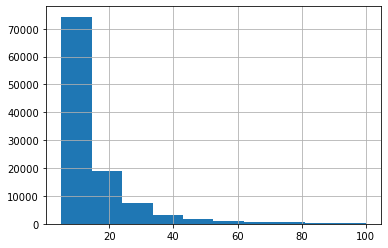

In [38]:
df[(df['img_cnt'] > 5) & (df['img_user'] > 1)]['img_cnt'].hist(range = [5, 100])

In [16]:
import matplotlib.pyplot as plt

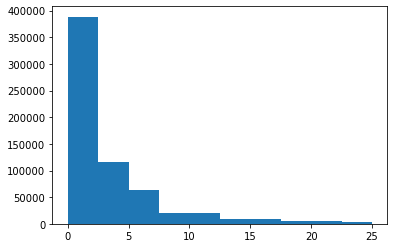

In [25]:
plt.hist(df[df['img_user'] != 0]['img_cnt'], range = [0, 25])
plt.show()

In [66]:
meta_dataset[0]

{'main_category': 'AMAZON FASHION',
 'title': "BALEAF Women's Long Sleeve Zip Beach Coverup UPF 50+ Sun Protection Hooded Cover Up Shirt Dress with Pockets",
 'average_rating': 4.2,
 'rating_number': 422,
 'features': ['90% Polyester, 10% Spandex',
  'Zipper closure',
  'Machine Wash',
  'Long sleeve sun protection coverups--UPF 50+ blocks the sun from burning',
  'Zipped v-neckline--fashionable V neck and smooth 1/4 zipper allows to staying place as you like',
  'Two drop-in side pockets--hold your phone or keys well，no worries of falling out',
  'Hoodie with non-slip drawcord--Enhancing hooded design is convenient to wrap your face and enough space to put your head and hair easily',
  'A flattering coverups company you spend all day on the beach，traveling with lovers or busying around house. Recommended For everyday leisure or daily exercise'],
 'description': [],
 'price': '31.99',
 'images': {'hi_res': ['https://m.media-amazon.com/images/I/61KIZjb54AL._AC_UL1500_.jpg',
   'https://

In [5]:
from urllib import request
import time
from io import BytesIO
from PIL import Image

url = "https://m.media-amazon.com/images/I/61OkTrsW88L._AC_UL1500_.jpg"

# time check
start = time.time()

# request.urlopen()
res = request.urlopen(url).read()

# 이미지 다운로드 시간 체크
print(time.time() - start)


# Image open
img = Image.open(BytesIO(res))

0.5682687759399414


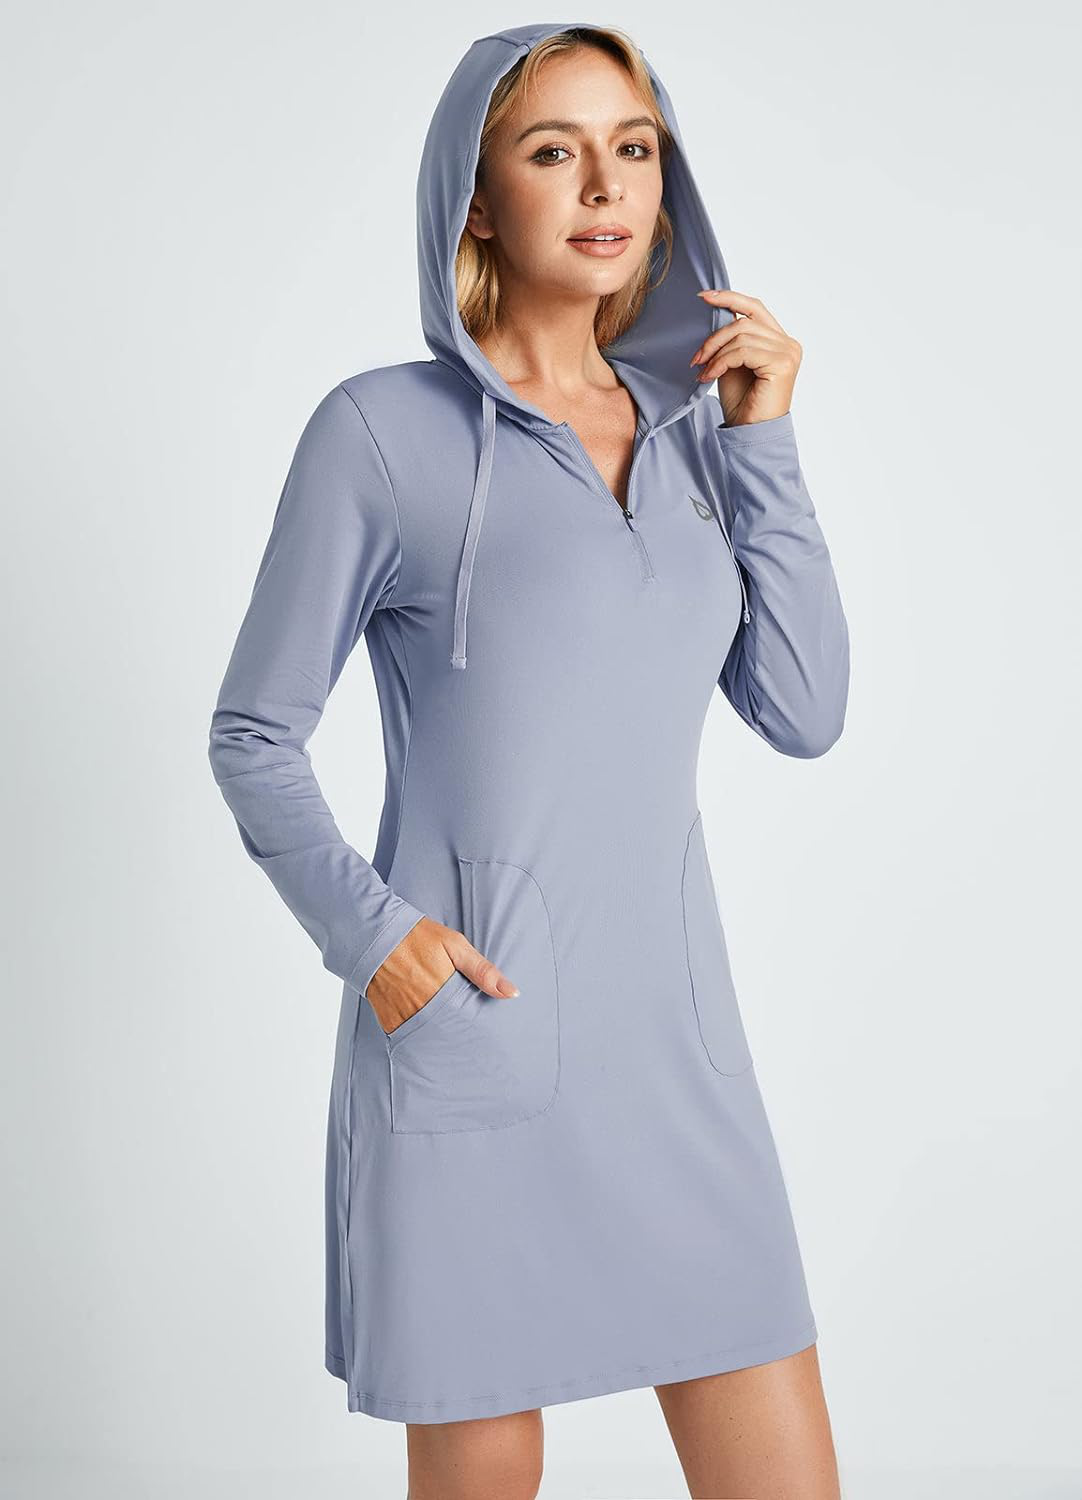

In [6]:
img